In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/data2.csv")

In [3]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [4]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [5]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [6]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=70,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(70,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(70, activation='tanh'))

In [14]:
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 68, 70)            280       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 68, 70)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                333270    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 71        
Total params: 333,621
Trainable params: 333,621
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 62752 samples, validate on 15689 samples
Epoch 1/60
62752/62752 [==============================] - 22s 344us/step - loss: 0.6754 - acc: 0.5927 - val_loss: 0.6532 - val_acc: 0.6073
Epoch 2/60
62752/62752 [==============================] - 18s 292us/step - loss: 0.6524 - acc: 0.6198 - val_loss: 0.6509 - val_acc: 0.6204
Epoch 3/60
62752/62752 [==============================] - 18s 290us/step - loss: 0.6502 - acc: 0.6211 - val_loss: 0.6515 - val_acc: 0.6128
Epoch 4/60
62752/62752 [==============================] - 18s 295us/step - loss: 0.6499 - acc: 0.6214 - val_loss: 0.6501 - val_acc: 0.6165
Epoch 5/60
62752/62752 [==============================] - 17s 272us/step - loss: 0.6484 - acc: 0.6228 - val_loss: 0.6510 - val_acc: 0.6136
Epoch 6/60
62752/62752 [==============================] - 17s 276us/step - loss: 0.6478 - acc: 0.6227 - val_loss: 0.6486 - val_acc: 0.6150
Epoch 7/60
62752/62752 [==============================] - 17s 275us/step - loss: 0.6474 - acc: 0.6245 - val_loss: 0.

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

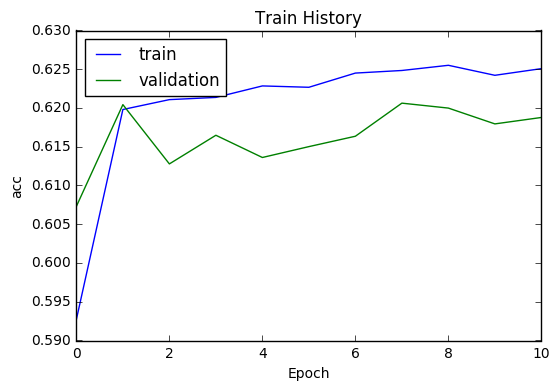

In [19]:
show_train_history(train_history,'acc','val_acc')

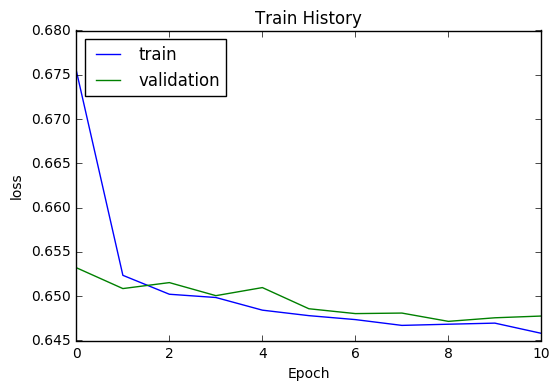

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 5s 262us/step


In [22]:
scores[1]

0.6217938911683227